In [2]:
import pandas as pd 
import numpy as np

In [3]:
df_orig = pd.read_csv("traffic_accidents.csv")

df_orig.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


In [4]:
# View Missing Values
df_orig.isna().sum()

Date                             1
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    1
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
Weather conditions              80
dtype: int64

In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          80 non-null     object
 1   Accident Spot                 81 non-null     object
 2   Area                          81 non-null     object
 3   County                        81 non-null     object
 4   Road/ Highway                 80 non-null     object
 5   Brief Accident Details/Cause  79 non-null     object
 6   Victims                       63 non-null     object
 7   Total people confirmed dead   72 non-null     object
 8   Time of the Accidents         25 non-null     object
 9   Weather conditions            1 non-null      object
dtypes: object(10)
memory usage: 6.5+ KB


### Handle Missing Values

In [6]:
# Make a copy of the db
df = df_orig.copy()

df.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


In [7]:
# Rename Columns
df = df.rename(
  columns={
    'Accident Spot': 'accident-spot',
    'Road/ Highway': 'road',
    'Brief Accident Details/Cause': 'accident-details',
    'Total people confirmed dead': 'total-people-confirmed-dead',
    'Time of the Accidents': 'accident-time',
    'Weather conditions': 'weather'
  }
)

In [8]:
df.columns

Index(['Date', 'accident-spot', 'Area', 'County', 'road', 'accident-details',
       'Victims', 'total-people-confirmed-dead', 'accident-time', 'weather'],
      dtype='object')

In [9]:

# Drop Columns (Weather Condition, Time of accident)
df = df.drop(columns=['weather', 'accident-time'], axis=1)

df.columns

Index(['Date', 'accident-spot', 'Area', 'County', 'road', 'accident-details',
       'Victims', 'total-people-confirmed-dead'],
      dtype='object')

In [10]:
df.head()

,Date,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1


In [11]:
# View Missing Values
df.isna().sum()

Date                            1
accident-spot                   0
Area                            0
County                          0
road                            1
accident-details                2
Victims                        18
total-people-confirmed-dead     9
dtype: int64

In [12]:
# Fill the victims column with the average value
frequent = df['Victims'].mode()[0]

df['Victims'] = df['Victims'].fillna(frequent)

In [13]:
# Replace non-numeric values with NaN's
df['total-people-confirmed-dead'] = pd.to_numeric(df['total-people-confirmed-dead'], errors='coerce')

# Fill the missing values in confirmed dead using the median values
df["total-people-confirmed-dead"] = df["total-people-confirmed-dead"].fillna(df['total-people-confirmed-dead'].median())

In [14]:
# Convert date column to datetime type
df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


# Extract Date Data to Different Columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Drop the date column
df = df.drop("Date", axis=1)

In [15]:
df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           1
accident-details               2
Victims                        0
total-people-confirmed-dead    0
year                           1
month                          1
day                            1
dtype: int64

In [16]:
df = df.dropna(subset=['month'])

df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           1
accident-details               2
Victims                        0
total-people-confirmed-dead    0
year                           0
month                          0
day                            0
dtype: int64

In [17]:
df = df.dropna()

df.isna().sum()

accident-spot                  0
Area                           0
County                         0
road                           0
accident-details               0
Victims                        0
total-people-confirmed-dead    0
year                           0
month                          0
day                            0
dtype: int64

In [18]:
df.head()

,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead,year,month,day
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,2023.0,8.0,8.0
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,2022.0,12.0,1.0


## Categorize Data and Drop Columns

Utilize sklearn's one hot encoder to encode columns like (Area, County, and Road) into numerical classes

**Columns Encoded:**
- Area
- County
- Accident Details

**Columns Dropped:**
- County
- Area
- Accident Spot
- Road


In [19]:
df.head()

,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead,year,month,day
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,2023.0,8.0,8.0
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,2022.0,12.0,1.0


In [20]:
df['County'] = df['County'].astype(str)


# Encode the columns
dummies = pd.get_dummies(df['County'], prefix='County')

dummies = dummies.astype(int)

df = pd.concat([df, dummies], axis=1)

df.head()

,accident-spot,Area,County,road,accident-details,Victims,total-people-confirmed-dead,year,month,day,...,County_Nairobi,County_Nairobi,County_Naivasha,County_Nakuru,County_Narok,County_Taita Taveta,County_Tharaka Nithi,County_Turkana,County_Uansin Gishi,County_Vihiga
0,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,...,0,0,0,1,0,0,0,0,0,0
1,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0,...,0,0,0,1,0,0,0,0,0,0
2,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,...,0,0,0,0,1,0,0,0,0,0
3,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,...,0,0,0,0,1,0,0,0,0,0
4,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1.0,2022.0,12.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Drop the county, area and accident spot columns
df = df.drop(columns=['County', 'Area', 'accident-spot', 'road'], axis=1)

df.head()

,accident-details,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,...,County_Nairobi,County_Nairobi,County_Naivasha,County_Nakuru,County_Narok,County_Taita Taveta,County_Tharaka Nithi,County_Turkana,County_Uansin Gishi,County_Vihiga
0,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,vehicle and motorcycle collision,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Run over,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Convert the accident detail column to a more cleaner version
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'matatu' if 'matatu' in x.lower() else x)
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'truck' if 'truck' in x.lower() else x)
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'bus' if 'bus' in x.lower() else x)
df['accident-details'] = df['accident-details'].apply(
    lambda x: 'car' if any(word in x.lower() for word in ['vehicle', 'car']) else x)


df.head()

,accident-details,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,...,County_Nairobi,County_Nairobi,County_Naivasha,County_Nakuru,County_Narok,County_Taita Taveta,County_Tharaka Nithi,County_Turkana,County_Uansin Gishi,County_Vihiga
0,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,car,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Run over,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df['accident-details'] = df['accident-details'].astype(str)


# Encode the columns
dummies = pd.get_dummies(df['accident-details'], prefix='Cause')

dummies = dummies.astype(int)

df = pd.concat([df, dummies], axis=1)

df.head()

,accident-details,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,...,Cause_Head on Collision,Cause_Head on collision,Cause_Head on collision,Cause_Motorist crashed into toll station,Cause_Run over,Cause_bus,Cause_car,Cause_matatu,Cause_shuttle rammed into a lorry,Cause_truck
0,Head on Collision,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,car,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Head on Collision,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Head on Collision,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Run over,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
df = df.drop('accident-details', axis=1)

df.head()

,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,...,Cause_Head on Collision,Cause_Head on collision,Cause_Head on collision,Cause_Motorist crashed into toll station,Cause_Run over,Cause_bus,Cause_car,Cause_matatu,Cause_shuttle rammed into a lorry,Cause_truck
0,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Create the target variable
Categorize the target variable as either
- low risk accidents (0)
- high risk accidents (1)

Utilized the victims column to come up with the target variable


In [25]:
# Visualize the number of dead people distribution
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
high_risk = ['Drivers/Occupants', 'Driver and passengers', 'Passengers and pedestrians',
                'Occupants of the small vehicle', 'Drivers,Passengers and pedestrians', 'Passengers and driver'
                'Passengers and drivers', 'Driver and other motorists ', 'Passangers and driver']

low_risk = ['Passengers', 'Pedestrian', 'Rider', 'Motorist', 'Pedestrians', 'passengers', 'passenger']


def categorize_victims(x):
  if x in high_risk:
    return 1
  elif x in low_risk:
    return 0
  
df['victims_target'] = df['Victims'].apply(categorize_victims)

df.head()

,Victims,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,...,Cause_Head on collision,Cause_Head on collision,Cause_Motorist crashed into toll station,Cause_Run over,Cause_bus,Cause_car,Cause_matatu,Cause_shuttle rammed into a lorry,Cause_truck,victims_target
0,Passengers,4.0,2023.0,8.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,Passengers,1.0,2023.0,8.0,7.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,Drivers/Occupants,4.0,2023.0,7.0,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,Driver and passengers,3.0,2022.0,12.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,Pedestrian,1.0,2022.0,12.0,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0


In [27]:
# Fill null values in the target column
df['victims_target'] = df['victims_target'].fillna(df['victims_target'].mean())

# Change the datatype of the column to int
df['victims_target'] = df['victims_target'].astype(int)

### Start on the prediction

In [28]:
# Split the data
from sklearn.model_selection import train_test_split


np.random.seed(42)

# Create the data
X = df.drop(columns=['victims_target', 'Victims'], axis=1)
y = df['victims_target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.head()

,total-people-confirmed-dead,year,month,day,County_Bomet,County_Homabay,County_Isiolo,County_Kajiado,County_Kakamega,County_Kiambu,...,Cause_Head on Collision,Cause_Head on collision,Cause_Head on collision,Cause_Motorist crashed into toll station,Cause_Run over,Cause_bus,Cause_car,Cause_matatu,Cause_shuttle rammed into a lorry,Cause_truck
68,0.0,2023.0,1.0,29.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
55,7.0,2021.0,12.0,12.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31,1.0,2022.0,7.0,5.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,7.0,2022.0,7.0,28.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64,2.0,2023.0,4.0,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### KNN Model

In [29]:
from sklearn.preprocessing import StandardScaler

# Instantiate the standard scaler
sc = StandardScaler()

# FIt and transform the features
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN 


# Initialize the model
knn = KNN(n_neighbors=7)

# Fit it into the data
knn.fit(X_train_sc, y_train)

# Check score
knn.score(X_test_sc, y_test)

0.875

In [31]:
# Prediction
y_pred = knn.predict(X_test_sc)

y_pred[:5]

array([0, 0, 0, 0, 0])

### Evaluate the KNN Model

Evaluation Metrics used:
- Confusion Matrix
- Classification report that contains (F1 score, Recall, Precision)
- ROC Curve

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[21,  0],
       [ 3,  0]])

Text(20.72222222222222, 0.5, 'Actual')

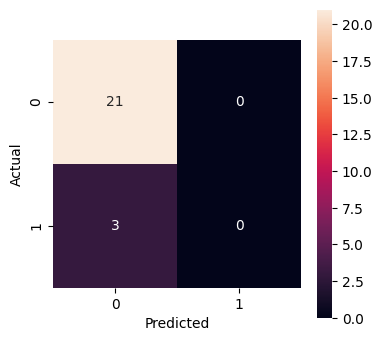

In [33]:
# Visualize the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24



/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ronny/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest Classifier Model Prediction

In [36]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Initialize the model
rfc = RandomForestClassifier(n_estimators=135)

# Fit the model
rfc.fit(X_train_sc, y_train)

# Check the score
rfc.score(X_test_sc, y_test)

0.9166666666666666

### Evaluate Random Forest Classifier


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.33      0.50         3

    accuracy                           0.92        24
   macro avg       0.96      0.67      0.73        24
weighted avg       0.92      0.92      0.90        24



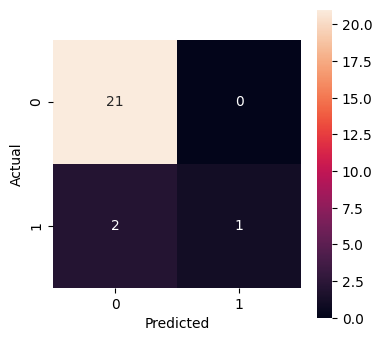

In [37]:
from sklearn.metrics import confusion_matrix, classification_report


# Prediction
y_pred = rfc.predict(X_test_sc)

# Visualize the confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, square=True)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')


print(classification_report(y_test, y_pred))

## Evaluation using ROC Curve

**KNN** had better AUC than **Random Forest** meaning it had better accuracy

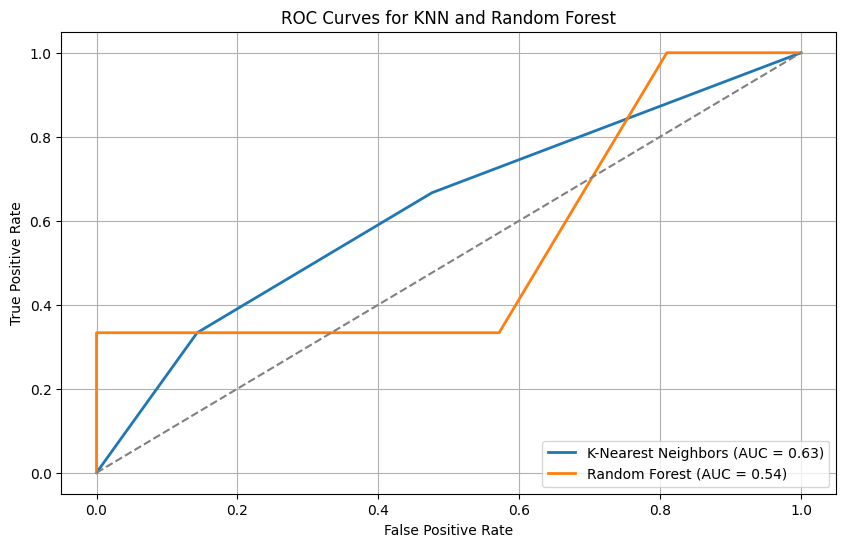

In [43]:
# Plot ROC curve
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for KNN and Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()